In [1]:
import glob
import pandas as pd
import os

In [2]:
dir = "/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress"

In [3]:
files = glob.glob(dir + "/*_kdj.statcorr.tsv")

In [10]:
files

['/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/300334_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/601890_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/300868_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/601233_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/605500_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/605090_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/000612_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/002313_kdj.statcorr.tsv',
 '/mnt/lustre/users/sanger-dev/sg-users/liubinxu/soft/finiance/stock_data/progress/688066_kdj.statcorr.tsv',
 '/mnt/lustre/users

In [4]:
a = pd.read_table(files[0], header=None)

In [20]:
a

,0,1,2,3,4,5
0,300334,type1,target_close1,open,-0.090405,0.138435
1,300334,type1,target_close1,close,-0.095261,0.118385
2,300334,type1,target_close1,high,-0.097483,0.110000
3,300334,type1,target_close1,low,-0.089401,0.142886
4,300334,type1,target_close1,vol,-0.128237,0.035198
...,...,...,...,...,...,...
553,300334,type3,target_close5,close_rolling_480_mean_amount_normalize60_roll...,-0.172874,0.020660
554,300334,type3,target_close5,close_rolling_480_mean_amount_normalize60_roll...,-0.091097,0.225214
555,300334,type3,target_close5,K,-0.186466,0.012446
556,300334,type3,target_close5,D,0.141934,0.058059


In [6]:
merge_pd = pd.DataFrame()

In [7]:
for file in files:
    add_df = pd.read_table(file, header=None)
    merge_pd = merge_pd.append(add_df)


In [29]:
merge_pd[merge_pd[3] == "close"][4]

1     -0.095261
94    -0.116048
187   -0.218459
280   -0.057215
373   -0.093098
         ...   
94    -0.060954
187   -0.208172
280   -0.156747
373   -0.113262
466   -0.075476
Name: 4, Length: 20868, dtype: float64

In [8]:
import numpy as np
from scipy import stats

In [34]:
mean_a = np.mean(merge_pd[merge_pd[3] == "close"][4])

In [35]:
std_a = np.std(merge_pd[merge_pd[3] == "close"][4])

In [39]:
te = stats.kstest(merge_pd[merge_pd[3] == "close"][4], "norm", (mean_a, std_a))

In [40]:
te.statistic

KstestResult(statistic=0.01753723224442788, pvalue=5.25999044540074e-06)

In [21]:
merge_pd_choose = merge_pd[merge_pd[1] == "type3"]

In [22]:
merge_pd_choose

,0,1,2,3,4,5
279,300334,type3,target_close1,open,-0.072344,0.335861
280,300334,type3,target_close1,close,-0.057215,0.446813
281,300334,type3,target_close1,high,-0.057039,0.448211
282,300334,type3,target_close1,low,-0.071709,0.340132
283,300334,type3,target_close1,vol,0.134964,0.071655
...,...,...,...,...,...,...
553,603599,type3,target_close5,close_rolling_480_mean_amount_normalize60_roll...,0.087033,0.233719
554,603599,type3,target_close5,close_rolling_480_mean_amount_normalize60_roll...,0.066597,0.362560
555,603599,type3,target_close5,K,-0.090796,0.214040
556,603599,type3,target_close5,D,0.032746,0.654643


In [25]:
for fea in set(list(a[3])):
    fea_val = merge_pd_choose[merge_pd_choose[3] == fea][4]
    mean_a = np.mean(fea_val)
    std_a = np.std(fea_val)
    te = stats.kstest(fea_val, "norm", (mean_a, std_a))
    kur = stats.kurtosis(fea_val)
    if mean_a < 0.05 or (te.pvalue < 0.5 and kur < 0.5):
        print("\t".join([fea, str(mean_a), str(std_a), str(te.pvalue), str(kur)]))

amount_normalize60_rolling_480_std_mean	-0.0014249048616820448	0.09161529668709877	6.819158009806832e-11	1.967538784389113
amount_normalize5_rolling_24_std_mean	-0.001272427145170188	0.08179946686607281	9.746240777028223e-12	1.7998205940484233
close_rolling_6_mean	-0.136691413429908	0.11213520002128148	0.4059422262649327	0.27760808571759643
close6_close24	-0.021944490006040734	0.11210298646804304	0.00584135901639317	0.5674266747319376
close480_close2880	-0.07027233352741347	0.11598719214185171	0.5025525491202614	0.17863604911813402
close_rolling_96_mean_amount_normalize5_rolling_96_mean_corr_roll24	-0.012612869702044184	0.08422763396503363	0.8631414467995757	-0.06251783305323588
amount_normalize5_rolling_480_std_mean	0.004268901923277952	0.10573411470042568	3.403853950103851e-13	1.5141400934354783
amount_normalize20_rolling_24_std_mean	-0.0017163127541922338	0.08505880085036614	4.155340408349652e-12	2.1022396393153624
amount_normalize5_rolling_96_std	0.015550611123019515	0.104441501622

close_rolling_96_mean	-0.13558752892515774	0.11175646165167161	0.33622005847037595	0.2562564916038155
amount_normalize20_rolling_24_mean	-0.008705284185925118	0.10701500298792029	0.46141111071461594	-0.021900100695525726
close_rolling_24_mean	-0.13645447496847246	0.11201518359482611	0.396020592093274	0.2746420171849655
close_rolling_480_mean_amount_normalize5_rolling_480_mean_corr_roll24	-0.0013063667747817088	0.08733967954618455	0.715379694134261	0.01867003634496367
close_rolling_480_mean_amount_normalize5_rolling_480_mean_corr_roll96	-0.0055021026017023356	0.09274500909488241	0.8664624176582689	-0.017877238044511135
close_rolling_6_std_mean	-0.019501602836947834	0.12070030097639362	0.05506125285360164	0.2933207119018362
close_rolling_96_mean_amount_normalize20_rolling_96_mean_corr_roll480	-0.019064769082623143	0.10086061617032668	0.13432904371583254	0.23665004909974696
close_rolling_480_mean_amount_normalize5_rolling_480_mean_corr_roll480	0.0043493971468882816	0.10286278774867853	0.6

In [50]:
import matplotlib.pyplot as plt

In [41]:
merge_pd = merge_pd_choose[merge_pd_choose[2]=="target_close2"]
fea_val = merge_pd[merge_pd[3] == 'amount_normalize20_rolling_96_mean'][4]


<AxesSubplot:ylabel='Density'>

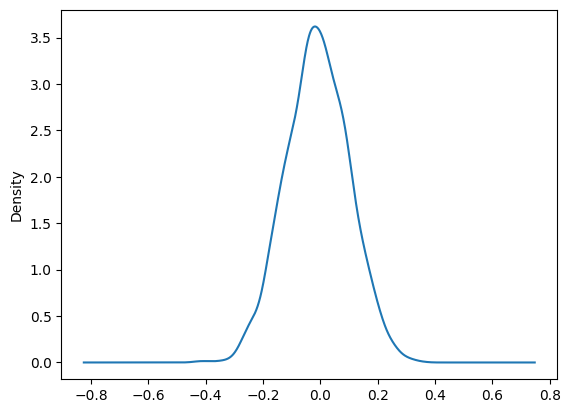

In [42]:
fea_val.plot(kind='kde')


<AxesSubplot:ylabel='Density'>

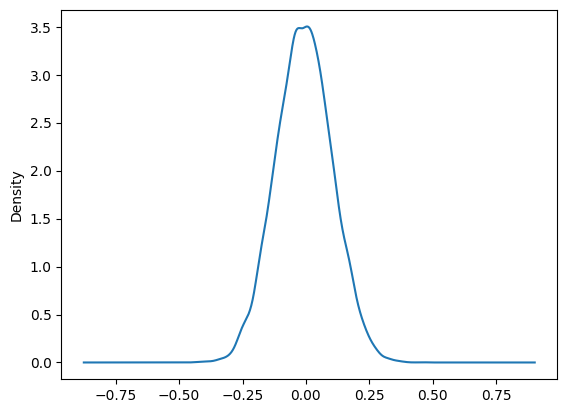

In [27]:
fea_val2 = merge_pd_choose[merge_pd_choose[3] == 'amount_normalize20_rolling_96_mean'][4]
fea_val2.plot(kind='kde')

In [49]:
amo = merge_pd[merge_pd[3] == 'amount_normalize20_rolling_96_mean']

In [50]:
amodchoose = amo[amo[4] < -0.2]

In [51]:
amodchoose.to_csv("neg_reg_st.tsv", sep="\t")

In [52]:
amodchoose = amo[amo[4] > 0.2]

In [55]:
amodchoose.to_csv("pos_reg_st.tsv", sep="\t")